In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt

In [ ]:
# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
# Preprocess data
input_shape = (28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalise data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [42]:
# Build model
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [41]:
# Train model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
H = model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0141 - accuracy: 0.9953
Epoch 00001: accuracy improved from -inf to 0.99533, saving model to model_weights
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model_weights/assets
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0141 - accuracy: 0.9953
Epoch 2/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0119 - accuracy: 0.9960
Epoch 00002: accuracy improved from 0.99533 to 0.99597, saving model to model_weights
INFO:tensorflow:Assets written to: model_weights/assets
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0119 - accuracy: 0.9960
Epoch 3/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0116 - accuracy: 0.9960
Epoch

KeyboardInterrupt: ignored

dict_keys(['loss', 'accuracy'])


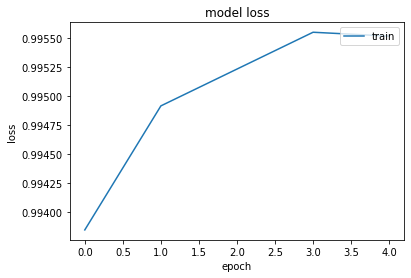

In [36]:
# Plot training
print(H.history.keys())
# summarize history for loss
plt.plot(H.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

313/313 [==============================] - 2s 7ms/step - loss: 0.0593 - accuracy: 0.9864
7


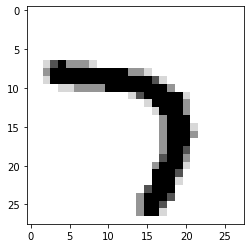

In [ ]:
# Test model
model.evaluate(x_test, y_test)
index = 60
plt.imshow(x_test[index].reshape(28,28), cmap='Greys')
pred = model.predict(x_test[index].reshape(1,28,28,1))
print(pred.argmax())